In [1]:
import pandas as pd
import numpy as np

data = {
    "age":[25,27,np.nan,29,31,np.nan,35],
    "income":[50000,540000,58000,np.nan,61000,62000,np.nan]
}

df = pd.DataFrame(data)
df

,age,income
0,25.0,50000.0
1,27.0,540000.0
2,NaN,58000.0
3,29.0,NaN
4,31.0,61000.0
5,NaN,62000.0
6,35.0,NaN


In [ ]:
from sklearn.impute import SimpleImputer
pd.set_option("display.float_format", "{:.0f}".format)
np.set_printoptions(suppress=True)

imputer = SimpleImputer(strategy="constant",fill_value=20) # < 평균값    # 1. median: 중앙값, 2. most_frequent: 최댓값, 3. constant: 고정값

result = imputer.fit_transform(df[["age", "income"]])     

df[["age", "income"]] = result
df[["age", "income"]]

,age,income
0,25,50000
1,27,540000
2,20,58000
3,29,20
4,31,61000
5,20,62000
6,35,20


In [9]:
(df[["age", "income"]])

,age,income
0,25.0,50000.0
1,27.0,540000.0
2,NaN,58000.0
3,29.0,NaN
4,31.0,61000.0
5,NaN,62000.0
6,35.0,NaN


In [5]:
df.isnull().sum()

age       2
income    2
dtype: int64

In [6]:
df.dropna()

,age,income
0,25.0,50000.0
1,27.0,540000.0
4,31.0,61000.0


In [2]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. 예제 데이터 생성
data = {
    'gender': ['male', 'female', 'female', 'male', 'female'],
    'grade': ['A', 'B', 'A', 'C', 'B']
}

df = pd.DataFrame(data)
df



,gender,grade
0,male,A
1,female,B
2,female,A
3,male,C
4,female,B


In [7]:
le_gender = LabelEncoder()
le_grade = LabelEncoder()

df["gender_encode"] = le_gender.fit_transform(df["gender"])
df["grade_encode"] = le_grade.fit_transform(df["grade"])

df

,gender,grade,gender_encode,grade_encode
0,male,A,1,0
1,female,B,0,1
2,female,A,0,0
3,male,C,1,2
4,female,B,0,1


In [14]:
data = {
    'gender' : ['male','female','female','male','female'],
    'grade' : ['A','B','A','C','B']
}

df = pd.DataFrame(data)
df

,gender,grade
0,male,A
1,female,B
2,female,A
3,male,C
4,female,B


In [15]:
df = pd.get_dummies(df, columns=['gender'])
df

,grade,gender_female,gender_male
0,A,False,True
1,B,True,False
2,A,True,False
3,C,False,True
4,B,True,False


In [16]:
df = pd.get_dummies(df, columns=['grade'])
df

,gender_female,gender_male,grade_A,grade_B,grade_C
0,False,True,True,False,False
1,True,False,False,True,False
2,True,False,True,False,False
3,False,True,False,False,True
4,True,False,False,True,False


In [ ]:
# 전처리 마지막 단계에서 사용하여야 한다.
from sklearn.preprocessing import StandardScaler , MinMaxScaler

data = {
    'height': [150, 160, 165, 180, 155],
    'weight': [60, 65, 55, 90, 62]
}


df = pd.DataFrame(data)

# 표준화
std_scaler = StandardScaler() # 머신러닝 스케일링시 적용

df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=["height_std", "weight_std"])
df_std

minmax_scaler = MinMaxScaler() # 딥러닝 스케일링시 적용

df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=["height_mm", "weight_mm"] )
df_minmax

,height_mm,weight_mm
0,0.000000,0.142857
1,0.333333,0.285714
2,0.500000,0.000000
3,1.000000,1.000000
4,0.166667,0.200000


In [13]:
df_std

,height_std,weight_std
0,-1.165543,-0.522837
1,-0.194257,-0.114371
2,0.291386,-0.931303
3,1.748315,1.927960
4,-0.679900,-0.359450


In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [ ]:
# 판다스로 데이터 불러오기
df = pd.DataFrame(housing.data , columns=housing.feature_names) # column 이름을 feature_names 의 columns 를 사용하겠다
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# target 열을 데이터셋에 만들어주기
df["target"] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# 데이터셋의 info를 먼저 확인해야하는 방법은 데이터 타입들을 확인해야하기 때문
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [20]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df.isnull().sum() # 결측치 데이터 확인

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,7))
sns.boxplot(data=df[["MedInc", "Ave"]])

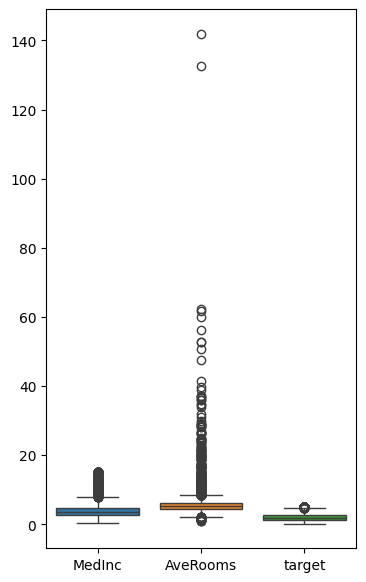

In [18]:
# 이상치 확인하기 위해 시각화 그리기
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,7))
sns.boxplot(data=df[['MedInc','AveRooms','target']])
plt.show()

In [21]:
def remove_iqr(df, columns):
    df_clean = df.copy() # df 복사본 만들기

    for col in columns: # ['col1', 'col2']
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3-Q1
        lower = Q1 - 1.5 * IQR # 이상치 하단 (공식상 1.5를 곱한다)
        upper = Q3 + 1.5 * IQR # 이상치 상단
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)] # 이 범위 안에 들어가는 데이터만 사용

    return df_clean # 행은 빼고 데이터만 저장된다

print("Before 데이터 개수:", df.shape)

        

Before 데이터 개수: (20640, 9)


In [17]:
df_cleaned = remove_iqr(df, ["MedInc", "AveRooms", "target"])
print("After : ", df_cleaned.shape)


After :  (18818, 9)


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# "stratify = y" 데이터의 불균형을 해소할 수 있다.
# random_state=42 = 똑같은 결과 값으로 
X_train, X_test, y_train, y_test = train_test_split(X , y, random_state=42, test_size = 0.2, stratify=y) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [11]:
import pandas as pd

df = pd.DataFrame(data=iris.data , columns = iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

(45,)

In [23]:
# k-fold

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


X ,y = load_iris(return_X_y=True)


model = RandomForestClassifier()

score = cross_val_score(model, X, y, cv=5)

score

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [24]:
score.mean()

np.float64(0.96)

In [ ]:
# 분류학습 모델들만 사용한다.
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)

model = RandomForestClassifier()

score = cross_val_score(model,X,y,cv=cv)

score.mean()

score

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])